In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 855.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 840.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://drive.google.com/uc?id=1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7'
df = pd.read_csv(url, header = 0)
print(df.head())
print(df.shape)
data=df

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no  
(40000, 14)


# I. Exploratory Data Analysis

## 1- Data shape analysis:
- **Target Variable:** y
- **Lines and columns:** 40000 lines, 14 columns
- **Types of variables:** 5 Quantitative variables, 9 Qualitative variables
- **Missing values analysis:** There is no missing values in the dataframe.

## 2- Background analysis
- **Visualization of the target:**
  - 92% negative and 8% positive: imbalanced dataset
- **Meaning of variables:**
  - Highest age group is between 30 and 40.
  - **Qualitative variables:** 5 binary variables, and 4 multi-categorical variables
- **Variables / target relationship:**
  - The rate of duration seems related to the subscription of customers.


 Here is the meaning of each variable in the data:

age: age of customer (numeric)

job: type of job (categorical)

marital: marital status (categorical)

education (categorical)

Default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

Contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of the year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)

y (output): has the client subscribed to a term deposit? (binary)

There are 5 Quantitative variables (age, balance, day, duration, and campaign). The other 9 variables are Qualitative.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
df['y'].value_counts ()
# The dataset is not balanced. no is much more than yes.

,count
y,
no,37104
yes,2896


In [ ]:
#check missing values in the dataframe
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


Likely, there are no missing values in the dataframe. However, there are null values in some features: 3209 in Balance and 3 in duration. Let's see a portion of these sub_datasets.

In [ ]:
#check null values in the dataframe
df[df==0].count()

,0
age,0
job,0
marital,0
education,0
default,0
balance,3209
housing,0
loan,0
contact,0
day,0


Let's analyze this result by checking clients that have a null duration. We can infer that the three clients whose last call duration was null didn't subscribe, which is normal as they didn't reply to the calls.

In [ ]:
df[df['duration'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,no


From the balance feature, we can infer that about 9% percent of clients have a negative balance, and about 8% have a null balance. Also, about 94% of clients didn't subscribe for both cases.

In [ ]:
df[df['balance'] < 0].shape[0]/df.shape[0]

0.093275

In [ ]:
df[df['balance'] == 0].shape[0]/df.shape[0]

0.080225

In [ ]:
balance=df[df['balance']== 0]
print(balance['y'].value_counts(normalize=True))

y
no     0.944219
yes    0.055781
Name: proportion, dtype: float64


In [ ]:
balance=df[df['balance']< 0]
print(balance['y'].value_counts(normalize=True))

y
no     0.947199
yes    0.052801
Name: proportion, dtype: float64


In [ ]:
#describe the df
df.describe(include='all')
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


#Target review
From the cell below, we can see that 92% of clients didn't subscribe to a term deposit. So the classes are not balanced. So we should use afterwards an other metric different from the accuracy,either recall, precision or f1 score.

y
no     0.9276
yes    0.0724
Name: proportion, dtype: float64


<Axes: xlabel='y'>

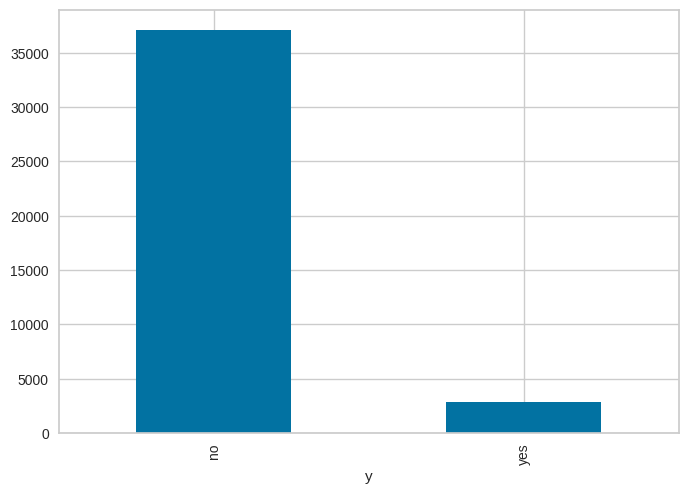

In [ ]:
print(df['y'].value_counts(normalize=True))
df['y'].value_counts().plot.bar()

Now, let's analyse the features of our dataset each other.

#1- Univariate Analysis:
##a- Categorical Unordered Univariate Analysis:
Let's first explore unique values in categorical features.

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

job----------------------------------------------- ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital------------------------------------------- ['married' 'single' 'divorced']
education----------------------------------------- ['tertiary' 'secondary' 'unknown' 'primary']
default------------------------------------------- ['no' 'yes']
housing------------------------------------------- ['yes' 'no']
loan---------------------------------------------- ['no' 'yes']
contact------------------------------------------- ['unknown' 'cellular' 'telephone']
month--------------------------------------------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
y------------------------------------------------- ['no' 'yes']


From the results below, we can see that qualitative variables are divided into 2 groups: 5 binary variables, and 4 multi categorical variables.

Therefore, the job, marital, and contact columns in our dataset are divided into many sub-categories. There is no weight or measure given to any values in these columns, so they are unordered features.

Therefore, the job, marital, and contact columns in our dataset are divided into many sub-categories. There is no weight or measure given to any values in these columns, so they are unordered features.

Now, let’s analyze these categories by using plots. Since they are categories, we will plot the bar plot.

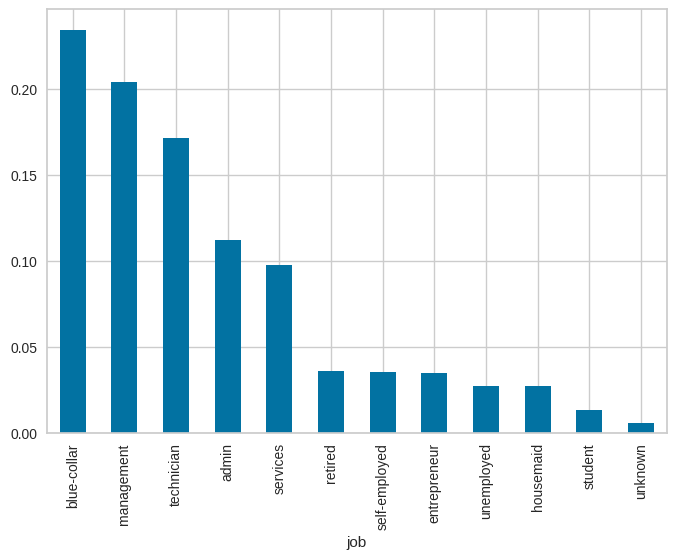

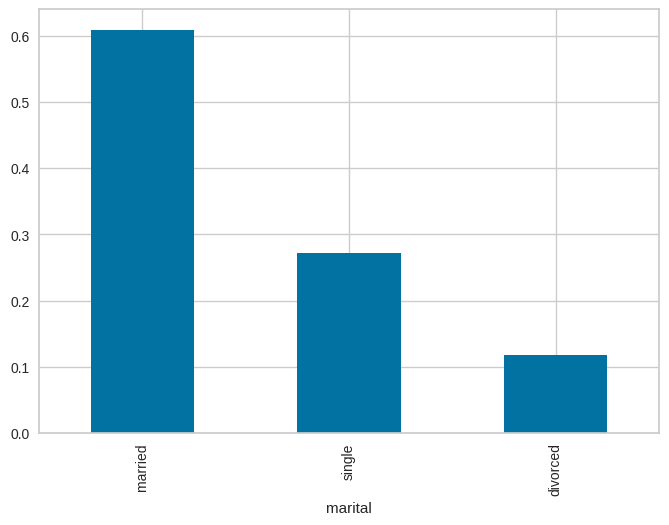

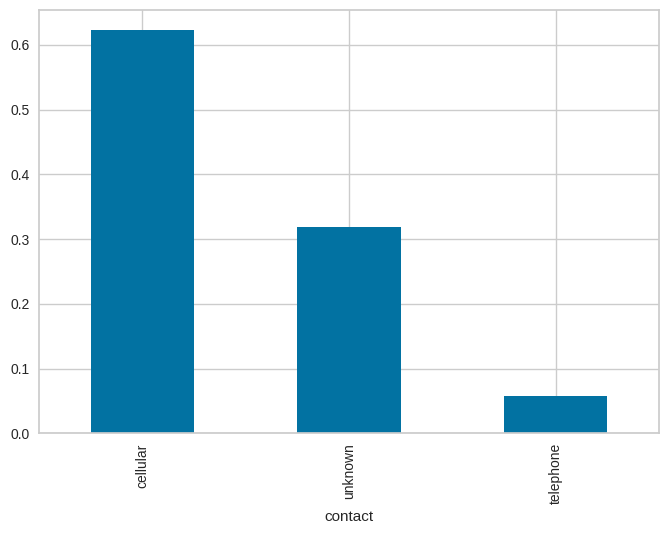

In [ ]:
for col in df[['job','marital','contact']].columns.values.tolist():
    df[col].value_counts(normalize=True).plot.bar()
    plt.show()

By the above bar plots, we can infer that the dataset contains more number of blue-collar and management workers compared to other categories in the job feature, also marital category is the most existing category in the marital feature, and then also most of the clients have cellular contact compared to other categories.

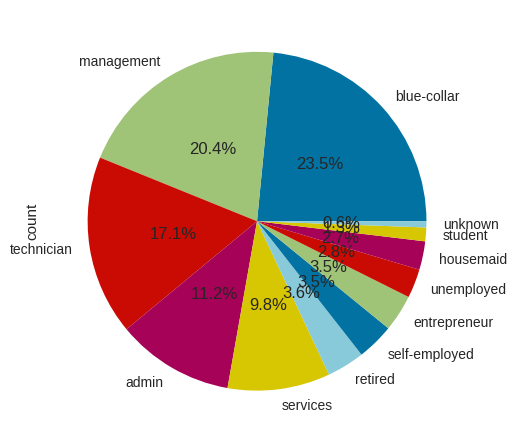

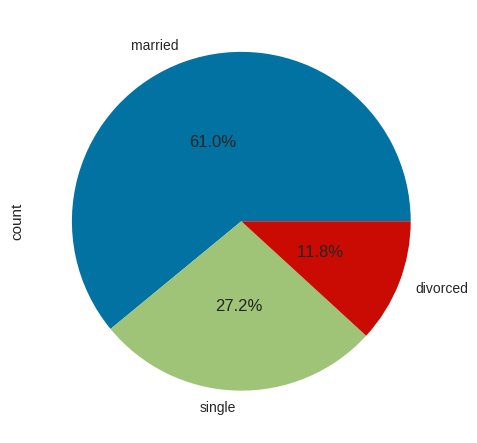

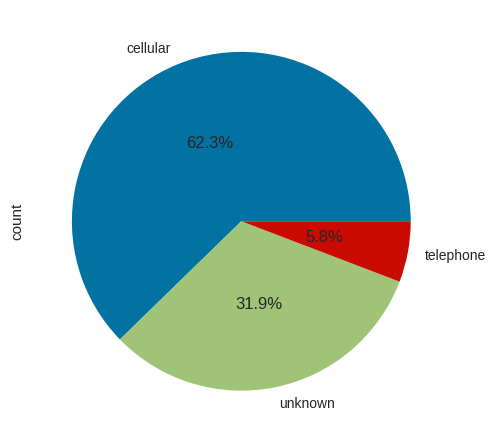

In [ ]:
for col in df[['job','marital','contact']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

The above pie charts show better the percentage of the distribution of categories in these 3 features.<br>
-job variable: 23.5% blue_collar and 20.4% management.<br>
-marital variable: 61% of clients are married.<br>
-contact variable: 62.3% of clients have cellular contact.

#b- Categorical Ordered Univariate Analysis:
Ordered variables are those variables that have a natural rank of order. Month and Education are examples of categorical ordered variables from our dataset. Let’s analyze these variables.

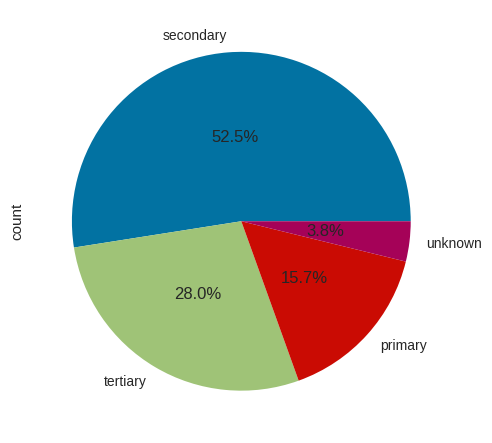

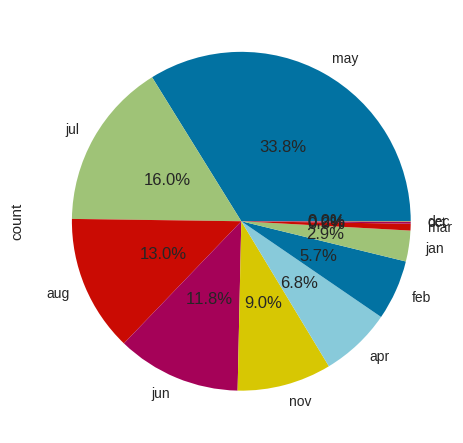

In [ ]:
for col in df[['education','month']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

##By the above pie charts, we can infer that:<br>
The dataset has a large number of clients having the secondary education level, with a percentage of 52.5%, after that tertiary with 28%, and next primary with 15.7%. Also, a very small percentage 3.8% of them have been unknown.<br>
For the month feature, we can infer that may is the month where most of calls happened, with a percentage of 33.8%. Next, the month of july with a percentage of 16% and then august month with 13%. And so on.

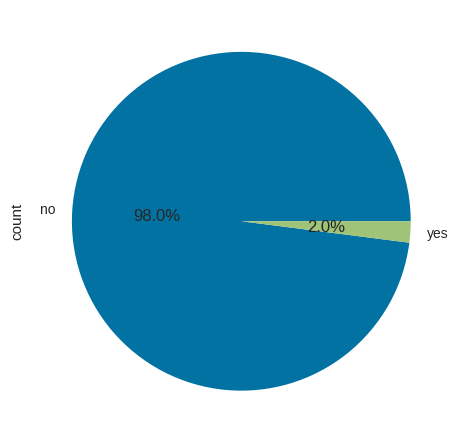

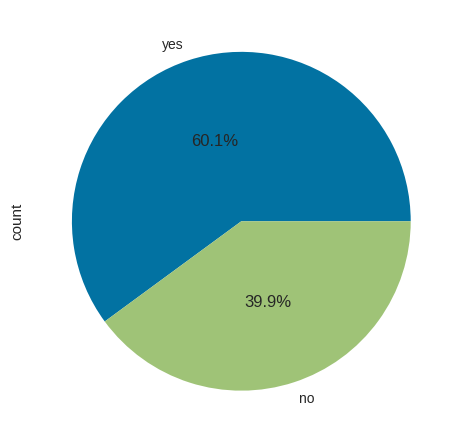

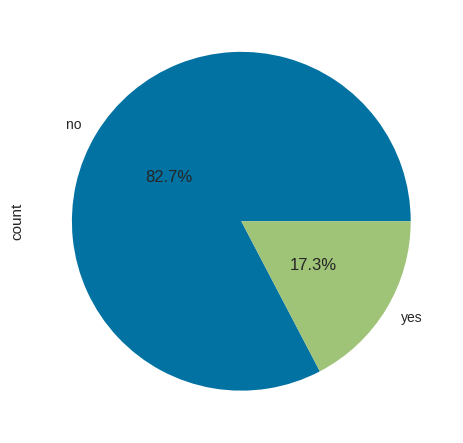

In [ ]:
for col in df[['default','housing','loan']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

From the above pie charts , we can make the following observations:
* defalut variable: The majority of clients haven't a credit in default (98%).
* housing variable: About 60.1% of clients have a housing loan.
* loan variable: About 82.7% of clients haven't a personal loan.

#c- Histogram of continuous values
* Quantitative variables

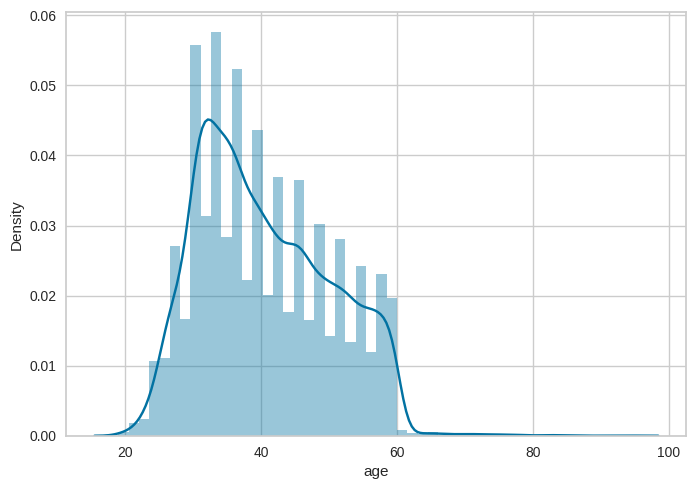

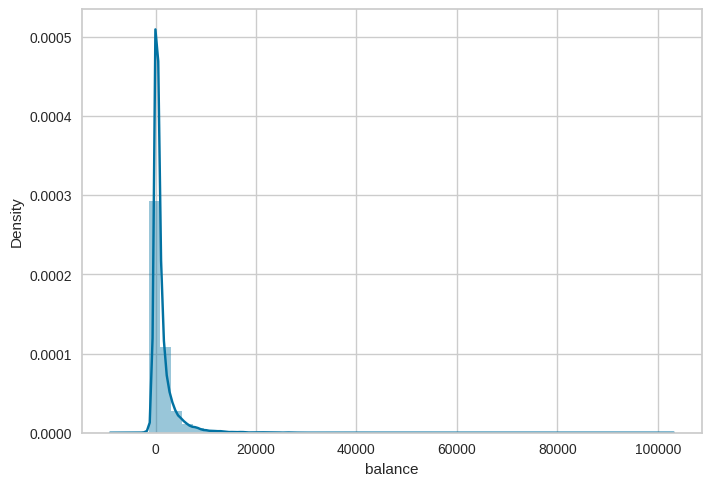

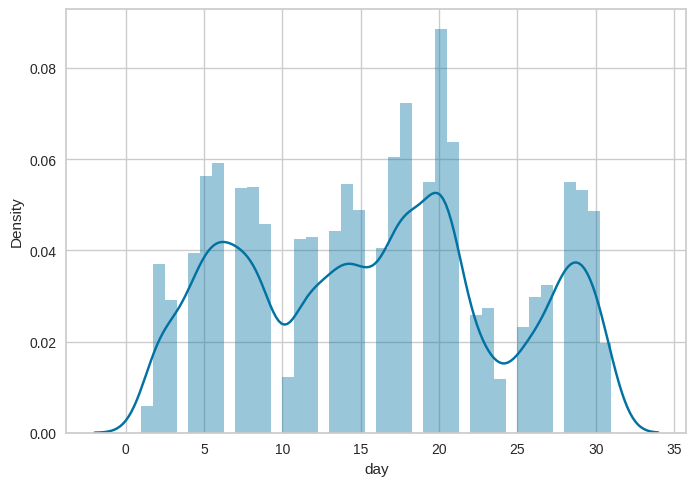

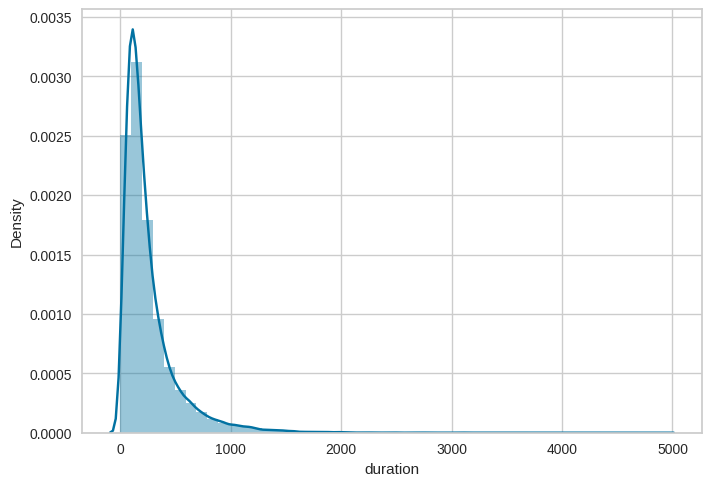

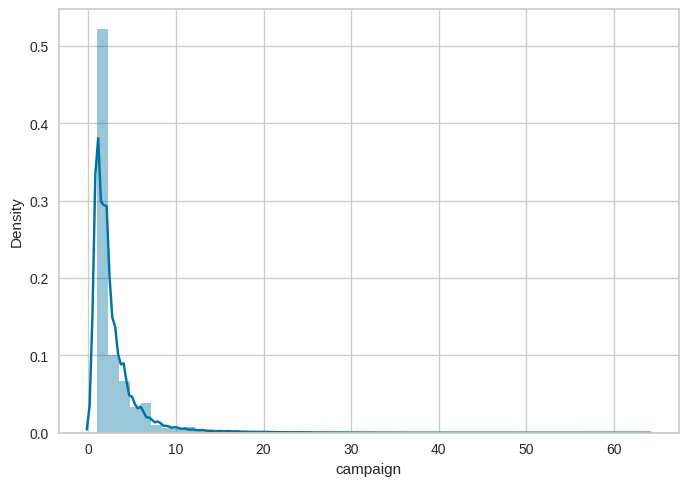

In [ ]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

From the histograms below, we can infer that:

* Most of the customers are aged between 30 and 40.
* Most of the customers haven't the highest value of balance.
* Day 20 is the most day when clients reply to calls.
* The duration value is mostly the lowest, it's normal as clients love always to not talk too much.
* Most of the campaigns are between 0 and 10 campaigns.

#2- Bivariate Analysis
##a- Numeric-Numeric Analysis:
Let's analyze our dataset by taking two or three numerical columns into consideration from a dataset.
***Noting that our numerical variables are: age, balance, day, duration and compaign.**

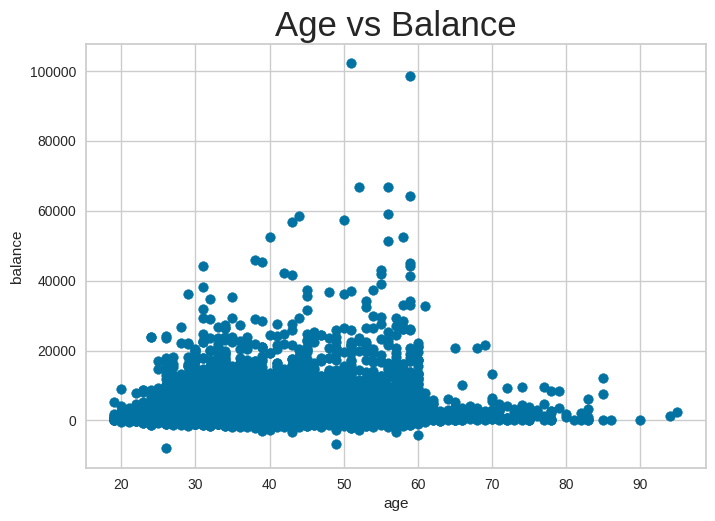

In [ ]:
#plot the scatter plot of balance and age variables in the data
plt.scatter(df.age,df.balance)
plt.xlabel('age')
plt.ylabel('balance')
plt.title("Age vs Balance",fontsize=25)
plt.show()

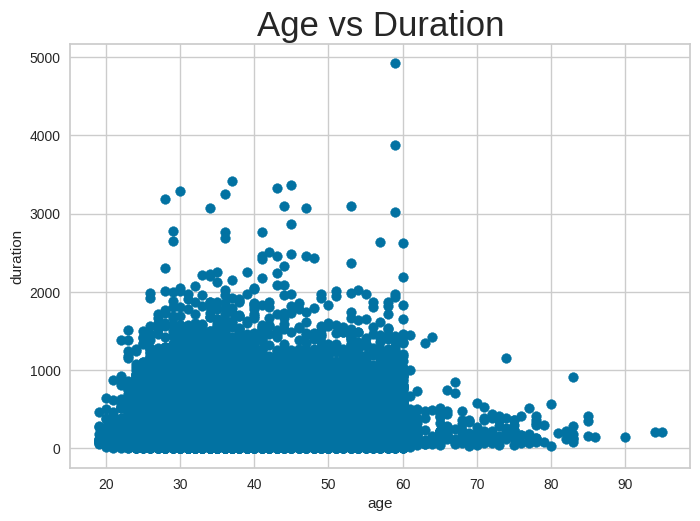

In [ ]:
#Age vs duration
plt.scatter(df.age,df.duration)
plt.xlabel('age')
plt.ylabel('duration')
plt.title("Age vs Duration",fontsize=25)
plt.show()

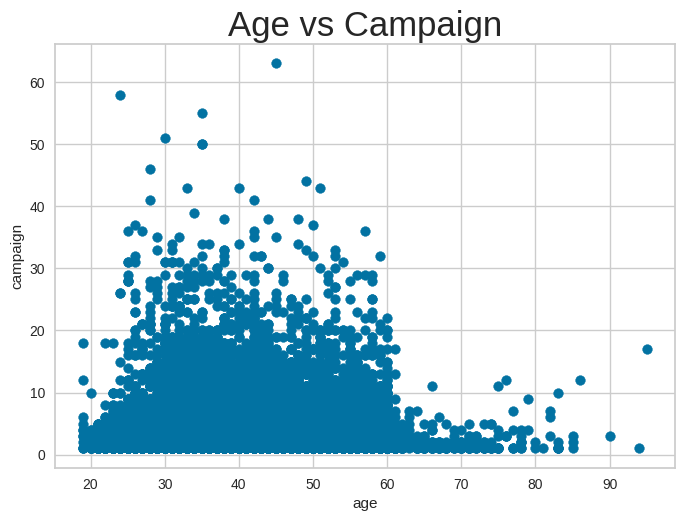

In [ ]:
#Age vs campaign
plt.scatter(df.age,df.campaign)
plt.xlabel('age')
plt.ylabel('campaign')
plt.title("Age vs Campaign",fontsize=25)
plt.show()

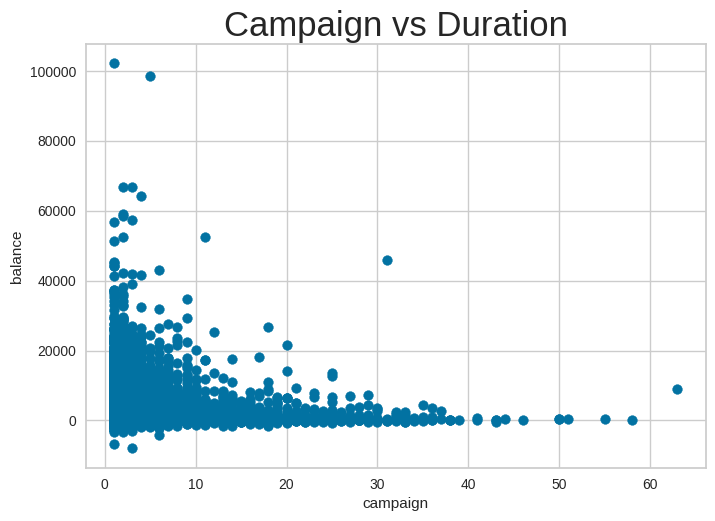

In [ ]:
# Campaign vs duration
plt.scatter(df.campaign,df.balance)
plt.xlabel('campaign')
plt.ylabel('balance')
plt.title("Campaign vs Duration",fontsize=25)
plt.show()
#transparency parameter(opac)

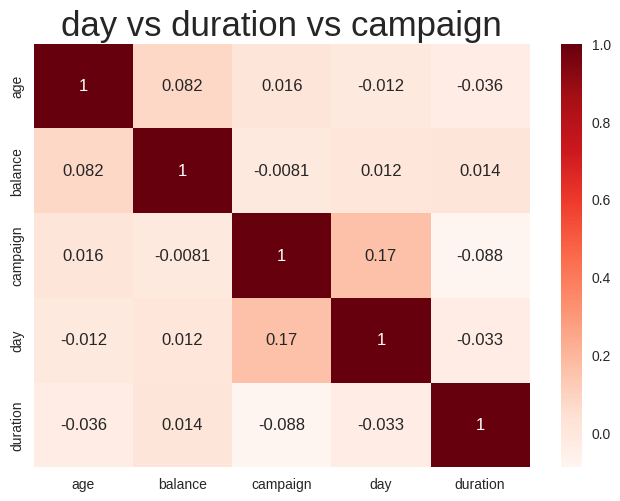

In [ ]:
#plot the correlation matrix
sns.heatmap(data[['age','balance','campaign','day','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("day vs duration vs campaign",fontsize=25)
plt.show()

From all these confsuion matrix plots, we can infer that balance and age are more correlated, also campaign and age , campaign and day, and balance and duration.

##b- Numeric - Categorical Analysis
Analyzing one numeric variable and one categorical variable from our dataset. We analyze them mainly using mean, median, and box plots. Remember that our categorical variables are: job, marital, education, default, housing, loan, contact, month, y

Let’s take some examples from our dataset.

In [ ]:
#group the balance by the target y
df.groupby('y')['balance'].mean()

,balance
y,
no,1249.752533
yes,1588.495856


In [ ]:
#group the duration by the target y
df.groupby('y')['duration'].mean()

,duration
y,
no,221.408042
yes,682.958564


* From these two codes above, we can infer that customers who subsecribed have the highest mean of balance and also for the duration.

If we apply the mean or the median on the age, day and campaign variables, we'll not see a much big difference between results, so let’s plot the box plot for them and check the behavior.

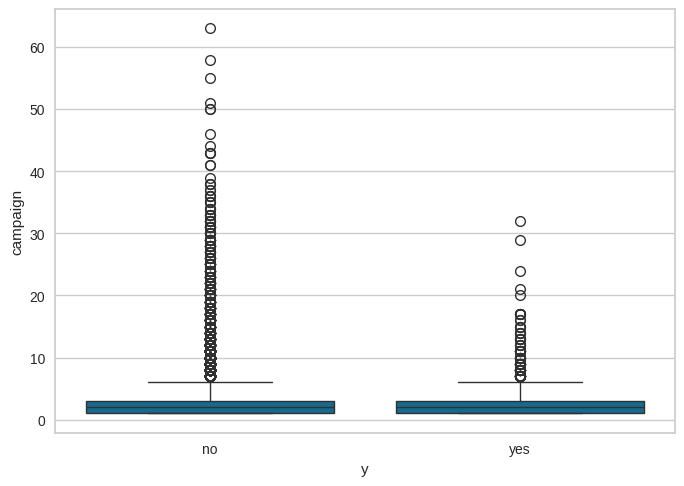

In [ ]:
#plot the box plot of campaign for y target.
sns.boxplot(x='y', y='campaign', data=df)
plt.show()

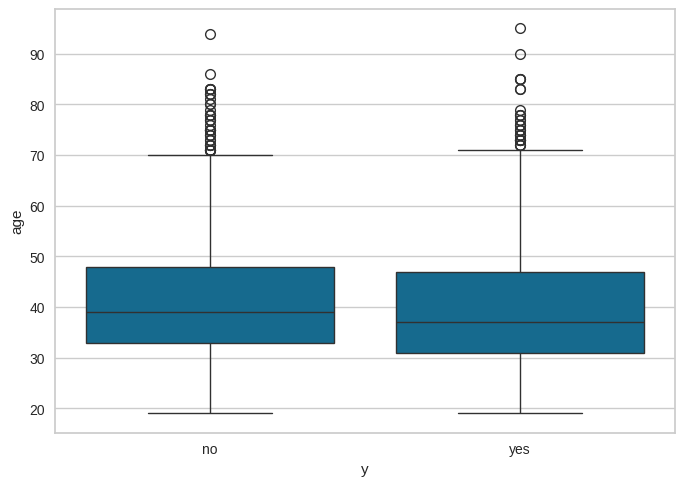

In [ ]:
#plot the box plot of campaign for y target.
sns.boxplot(x='y', y='age', data=df)
plt.show()

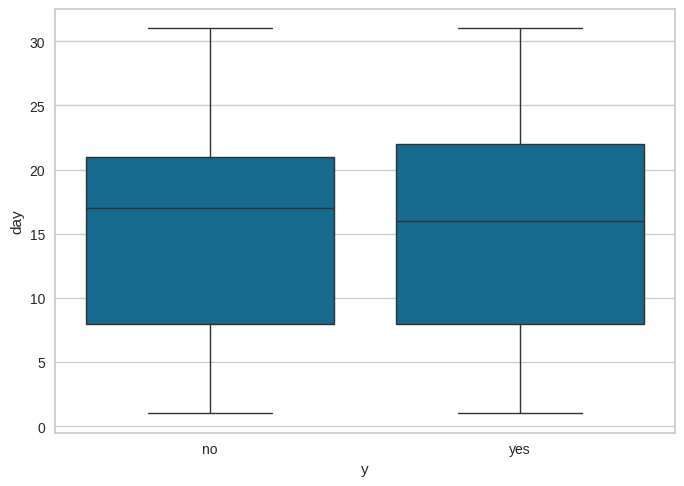

In [ ]:
#plot the box plot of campaign for y target.
sns.boxplot(x='y', y='day', data=df)
plt.show()

* We can't infer anyting from the first box plot
* The IQR for customers who didn't subscribe is on the higher age side.
* The IQR for customers who subscribed is on the higher day side.

##c- Categorical — Categorical Analysis
Since our target column is the y, we’ll see how different categories like job, marital, education, default, housing, loan, contact, month, are associated with the target column. So instead of ‘Yes’ and ‘No’, we will convert them into ‘1’ and ‘0’. By doing that, we’ll get the “subscription_rate”.

In [ ]:
df['subscription_rate'] = np.where(df.y=='yes',1,0)
df.subscription_rate.value_counts()

,count
subscription_rate,
0,37104
1,2896


In [ ]:
df['subscription_rate'].unique()

array([0, 1])

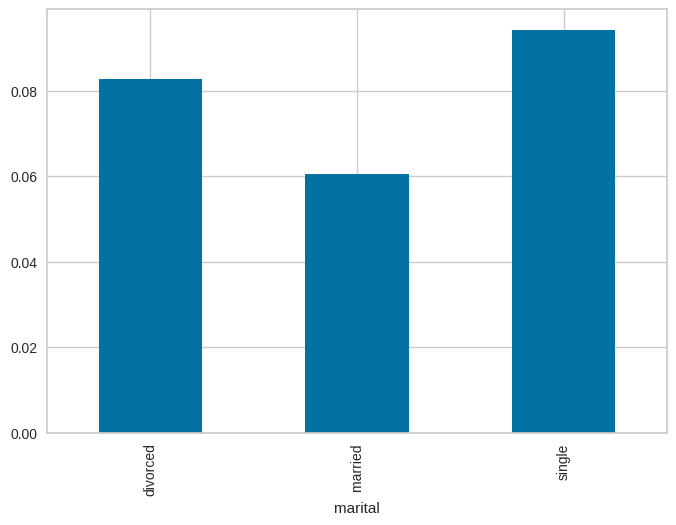

In [ ]:
#plot the bar graph of marital status with average value of subscription_rate
df.groupby('marital')['subscription_rate'].mean().plot.bar()
plt.show()

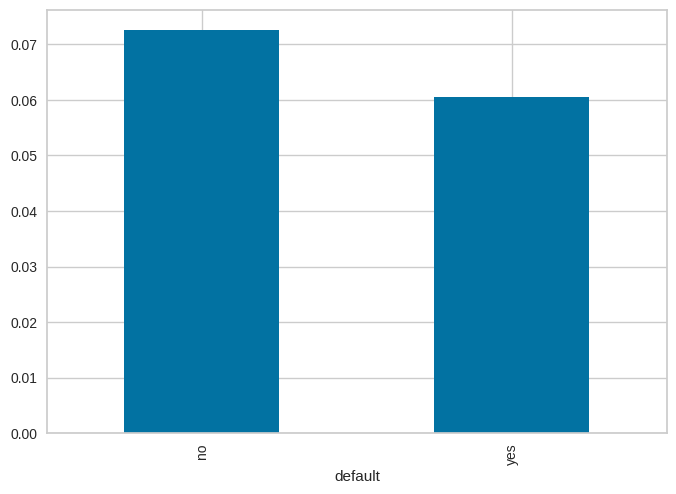

In [ ]:
#plot the bar graph of default status with average value of subscription_rate
df.groupby('default')['subscription_rate'].mean().plot.bar()
plt.show()

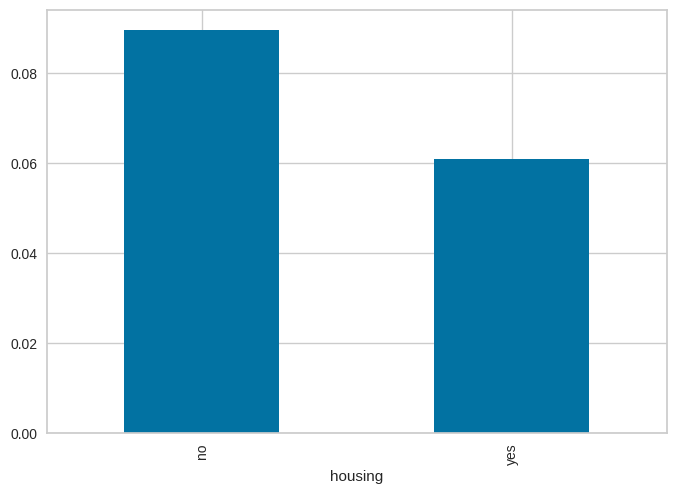

In [ ]:
#plot the bar graph of housing status with average value of subscription_rate
df.groupby('housing')['subscription_rate'].mean().plot.bar()
plt.show()

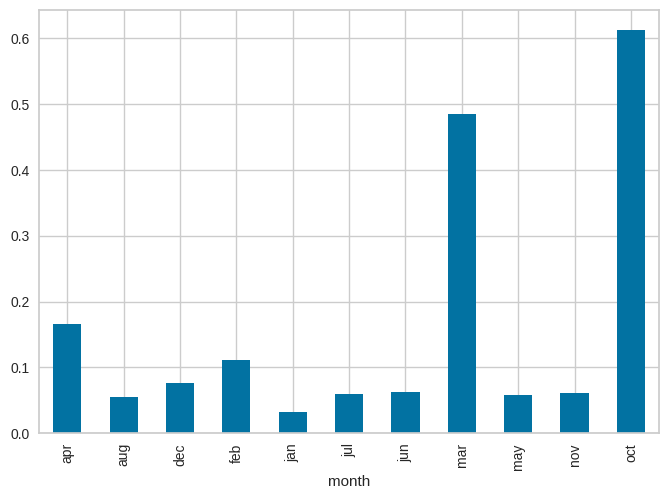

In [ ]:
df.groupby('month')['subscription_rate'].mean().plot.bar()
plt.show()

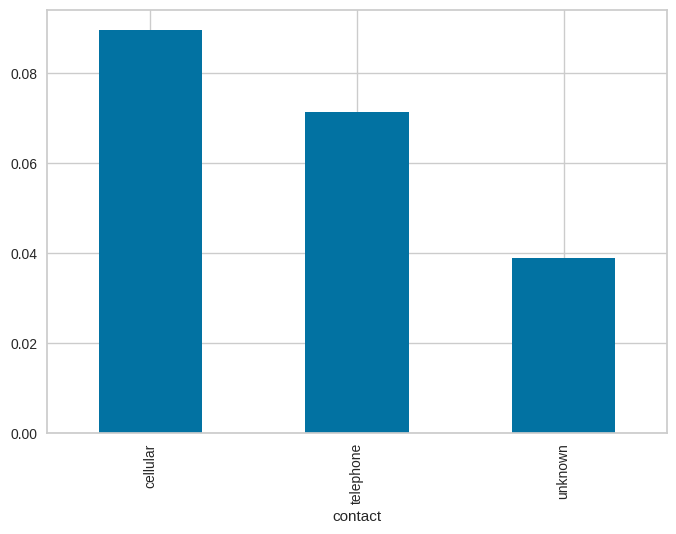

In [ ]:
df.groupby('contact')['subscription_rate'].mean().plot.bar()
plt.show()

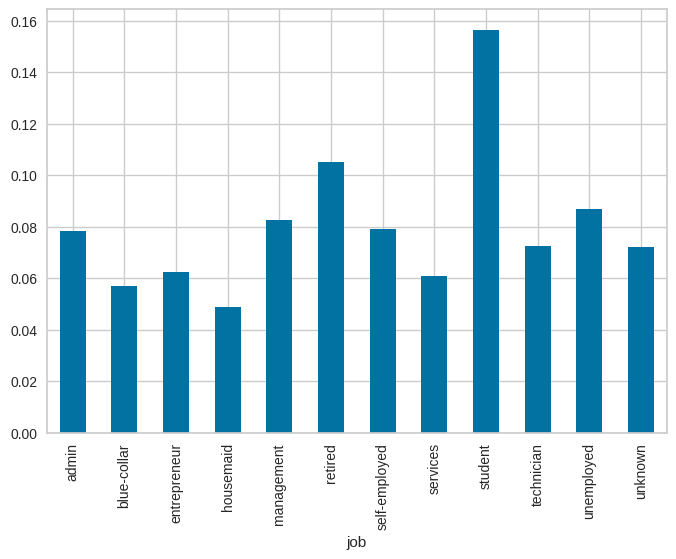

In [ ]:
df.groupby('job')['subscription_rate'].mean().plot.bar()
plt.show()

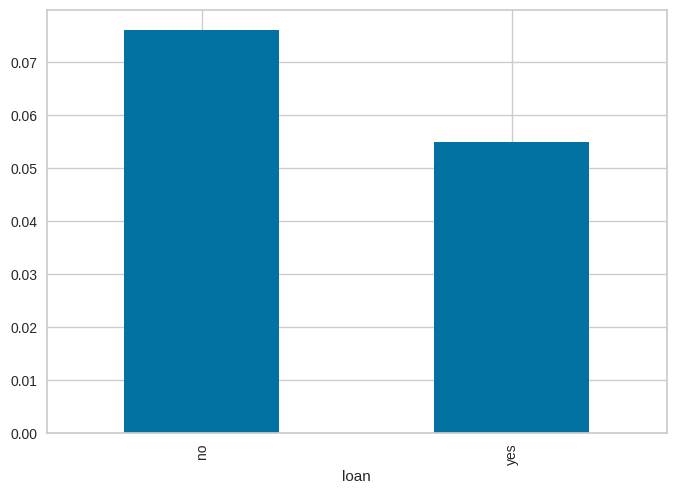

In [ ]:
df.groupby('loan')['subscription_rate'].mean().plot.bar()
plt.show()

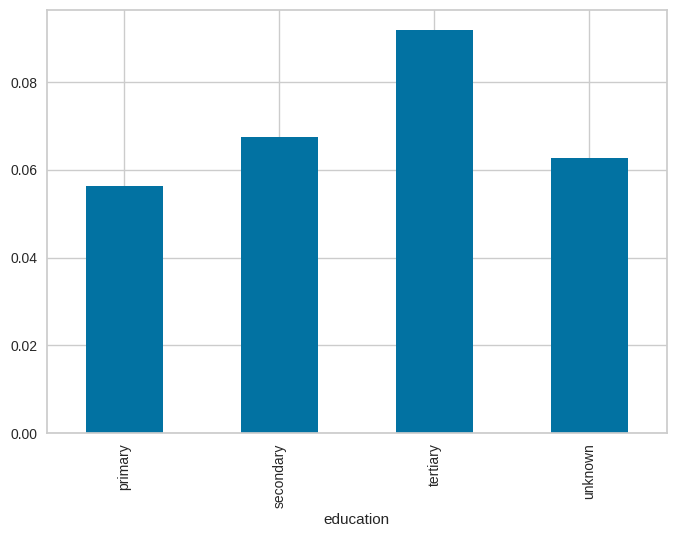

In [ ]:
df.groupby('education')['subscription_rate'].mean().plot.bar()
plt.show()

Results:
By the above graphs, we can infer that the rate of subscription is more for:

* Single marital status customers in the data set.
* Student job status customers
* tertiary education status customers
* customers with no loan
* customers with cellular contact
* the October month
* customers with no housing loan
* customers with no credit in default

##3- Quantitative variables/target Relashionship
* Creation of negative and positive subsets

In [ ]:
df_positive=df[df['y']=='yes']
df_negative=df[df['y']=='no']

* Plot graphs to see the relationship between age, day, duration, balance and campaign features and the target y

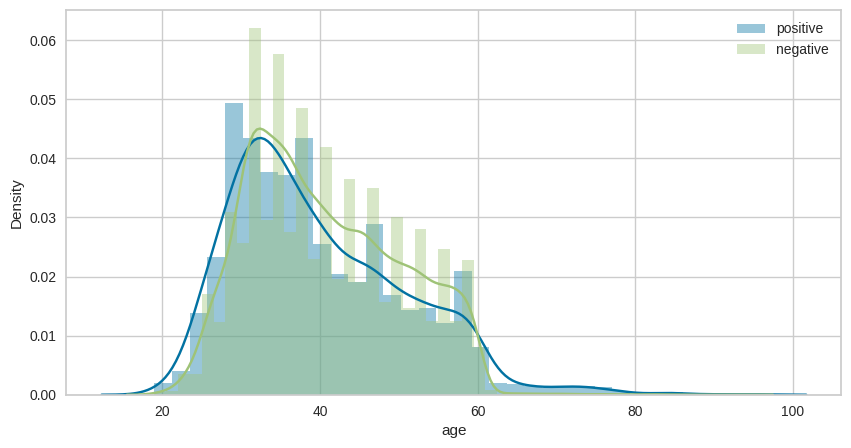

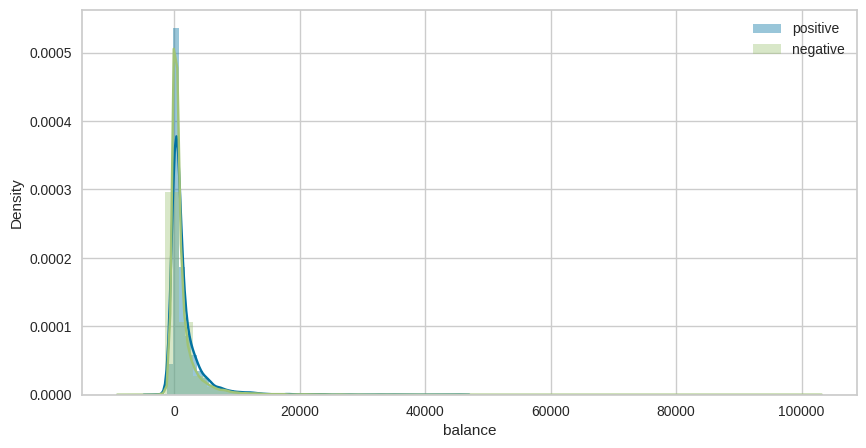

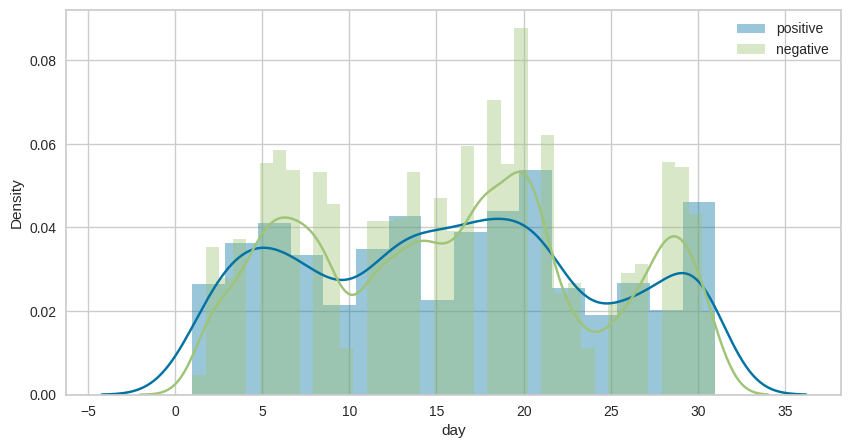

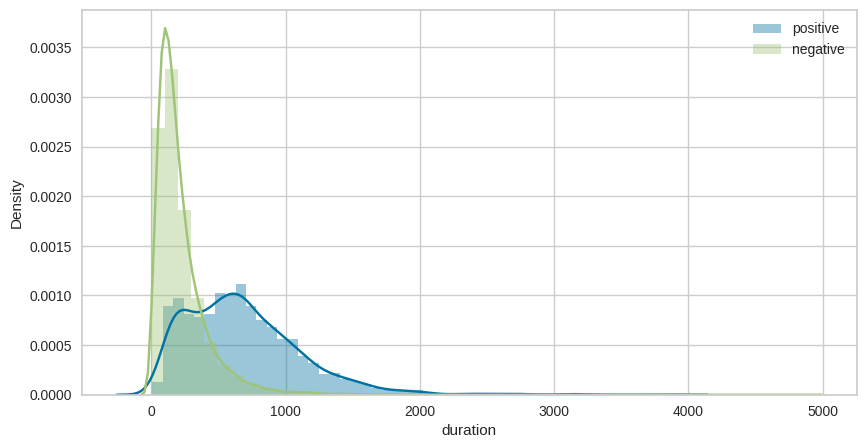

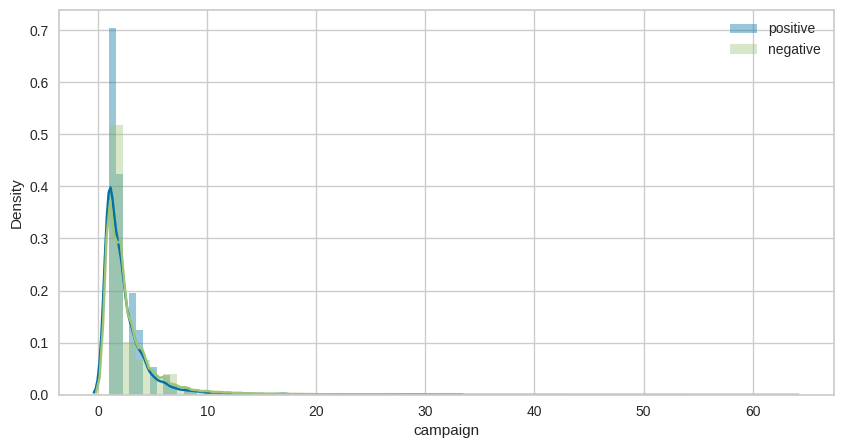

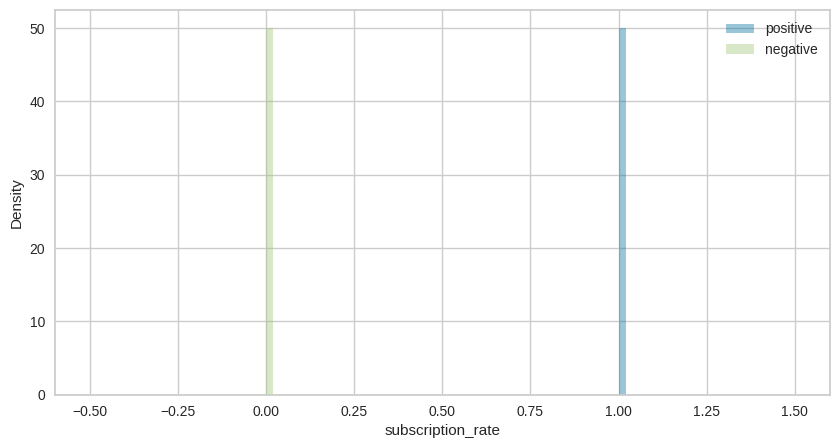

In [ ]:
for col in df.select_dtypes('int64'):
    plt.figure(figsize=(10,5))
    sns.distplot(df_positive[col],label='positive')
    sns.distplot(df_negative[col],label='negative')
    plt.legend()

Remarks: - The rate of duration seems related to the subscription of customers.
- We can't infer something special from other graphs.

##4- Multivariate Analysis
Let’s see how ‘education’, ‘marital’, and ‘y’ vary with each other. First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

marital    divorced   married    single
education                              
primary    0.093558  0.047560  0.079284
secondary  0.074981  0.058280  0.084207
tertiary   0.093394  0.076179  0.115424
unknown    0.077465  0.059536  0.065327


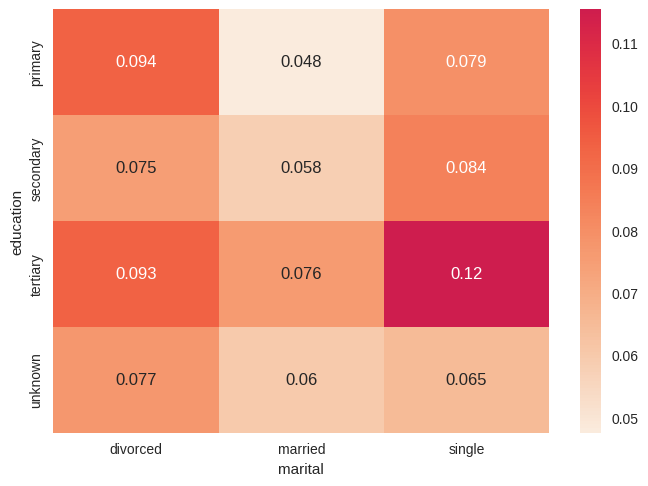

In [ ]:
result = pd.pivot_table(data=df, index='education', columns='marital',values='subscription_rate')
print(result)

#create heat map of education vs marital vs subscription_rate
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

Based on this Heatmap, we can infer that the married customers with primary education are less likely to subscribe to a term deposit and single customers with tertiary education are more likely to subscribe to a term deposit.

marital        divorced   married    single
job                                        
admin          0.091176  0.066438  0.091156
blue-collar    0.068493  0.049711  0.078669
entrepreneur   0.066667  0.056974  0.085586
housemaid      0.050000  0.041975  0.094017
management     0.091356  0.072266  0.099308
retired        0.173432  0.092421  0.047619
self-employed  0.096774  0.057671  0.126685
services       0.074906  0.049673  0.077706
student        0.000000  0.100000  0.162500
technician     0.059361  0.062655  0.092854
unemployed     0.101351  0.072441  0.109034
unknown        0.066667  0.066667  0.090909


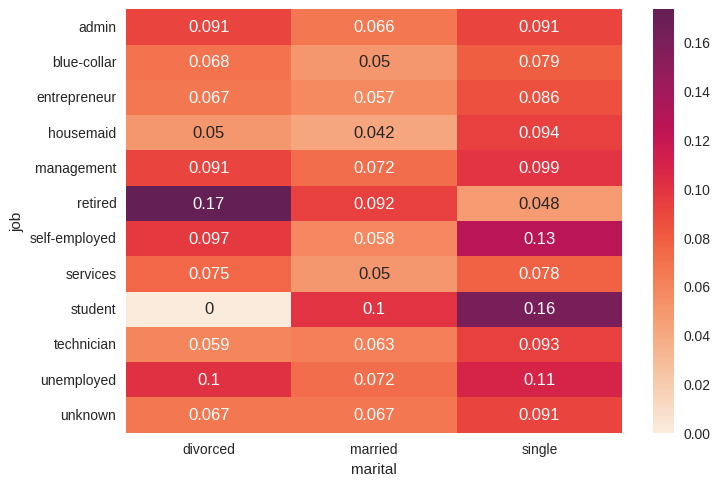

In [ ]:
result = pd.pivot_table(data=df, index='job', columns='marital',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

Based on the Heatmap above, we can infer that the married people with housemaid job are less likely to subscribe to a term deposit and divorced people with retired job are more likely to subscribe to a term deposit.

loan                 no       yes
job                              
admin          0.081149  0.066890
blue-collar    0.056728  0.058363
entrepreneur   0.068246  0.045714
housemaid      0.051064  0.034014
management     0.087654  0.054054
retired        0.120281  0.046980
self-employed  0.079564  0.077273
services       0.064098  0.048721
student        0.159223  0.000000
technician     0.077622  0.049393
unemployed     0.091908  0.038835
unknown        0.064935  0.500000


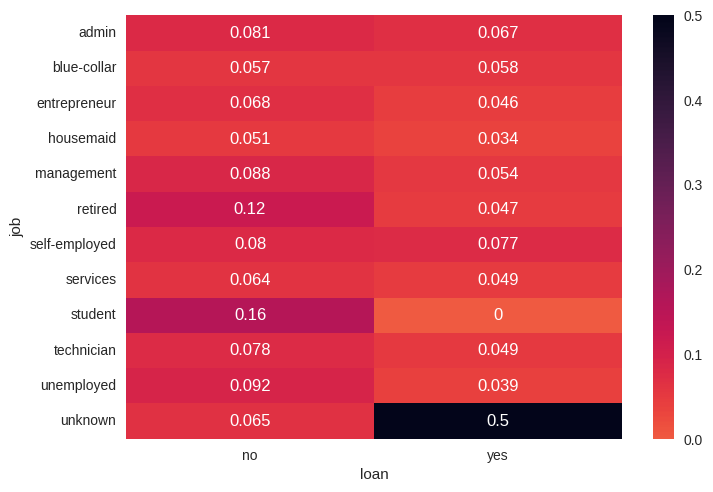

In [ ]:
result = pd.pivot_table(data=df, index='job', columns='loan',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

Based on the Heatmap above, we can infer that students with personal loan are less likely to subscribe to a term deposit and unkown job people with personal loan are more likely to subscribe to a term deposit.

housing              no       yes
job                              
admin          0.099612  0.067075
blue-collar    0.064490  0.054378
entrepreneur   0.074681  0.054907
housemaid      0.048023  0.050132
management     0.099552  0.068208
retired        0.126144  0.059471
self-employed  0.083700  0.075034
services       0.070117  0.056785
student        0.221053  0.079498
technician     0.086445  0.061872
unemployed     0.113752  0.056311
unknown        0.071429  0.080000


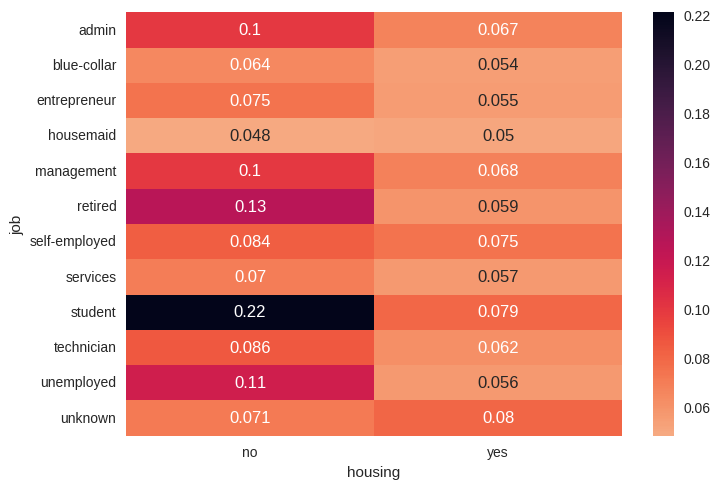

In [ ]:
result = pd.pivot_table(data=df, index='job', columns='housing',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

Based on the Heatmap above, we can infer that technician people with housing loan are less likely to subscribe to a term deposit and student people without housing loan are more likely to subscribe to a term deposit.

education       primary  secondary  tertiary   unknown
job                                                   
admin          0.044554   0.077088  0.119512  0.040541
blue-collar    0.049279   0.060848  0.118110  0.059226
entrepreneur   0.056818   0.069034  0.057099  0.081081
housemaid      0.048649   0.040580  0.068027  0.050000
management     0.040293   0.067502  0.087146  0.074074
retired        0.105155   0.084337  0.170306  0.084746
self-employed  0.031008   0.063406  0.101140  0.064516
services       0.068452   0.059957  0.047059  0.081481
student        0.277778   0.152482  0.173333  0.108108
technician     0.047297   0.066207  0.098707  0.023364
unemployed     0.100000   0.075563  0.105263  0.083333
unknown        0.044444   0.083333  0.038462  0.086538


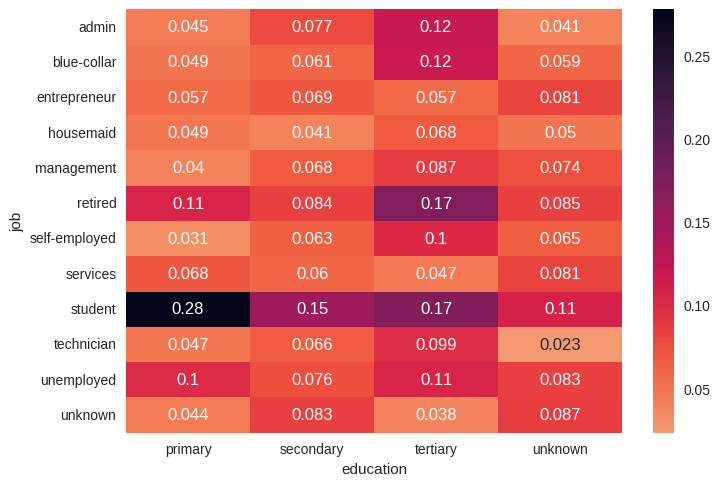

In [ ]:
result = pd.pivot_table(data=df, index='job', columns='education',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

Based on the Heatmap above, we can infer that technician people with unknown eduact=ation status are less likely to subscribe to a term deposit and student people with primary education level are most likely to subscribe to a term deposit.

###Make an analysis report using the Sweetvis library.*italicized text*

In [ ]:
#analyzing the dataset
advert_report = sv.compare([df_positive, 'positive'], [df_negative, 'negative'])
#display the report
advert_report.show_html('negative_positive.html')

                                             |          | [  0%]   00:00 -> (? left)

Report negative_positive.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We will calculate all duration and number of the calls inorder to compare them with duration and number of call that company would contact.

In [ ]:
#calculate all durarion and number of calls
sum_duration = df['duration'].sum()
sum_campaign = df['campaign'].sum()

print(f"Sum of call duration = {sum_duration/3600} hours")
print(f"number of total calls = {sum_campaign}")

Sum of call duration = 2831.3811111111113 hours
number of total calls = 115287


##5- Remove outliers
Before starting the modeling step, we should handle outliers. As we can see from the previous plots, there are a lot of outliers. Let's remove them. We'll use the z-score method. We will use a threshold equal to 3.

In [ ]:
#remove outliers with z-score method
z = np.abs(stats.zscore(df.select_dtypes('int64').drop(columns=['subscription_rate'])))
df_new = df[(abs(z) < 3).all(axis=1)]
df_new.shape

(37583, 15)

In [ ]:
df_new['subscription_rate'].unique()

array([0, 1])

#6- Applying the SMOTENN method to balance our dataset
Because our dataset is imbalanced, so we should use some techniques to handle this problem. Let's use the SMOTE upsampling technique.
We should first split the dataset into train and test sets. But before that, we should convert categorical columns into numeric variables to use the SMOTE method.


* Convert categorical columns to numeric values using LabelEncoder

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert each categorical column to numeric
for col in categorical_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

df_new=df_new.drop('y', axis=1)
print(df_new.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  subscription_rate  
0    5      8       261         1                  0  
1    5      8       151         1                  0  
2    5      8        76         1                  0  
3    5      8        92         1                  0  
4    5      8       198         1                  0  


In [ ]:
# Loop through each column in categorical_cols and print unique values
for col in categorical_cols:
    unique_values = df_new[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")


Unique values in 'job':
[ 4  9  2  1 11  5  0  7  6 10  3  8]


Unique values in 'marital':
[1 2 0]


Unique values in 'education':
[2 1 3 0]


Unique values in 'default':
[0 1]


Unique values in 'housing':
[1 0]


Unique values in 'loan':
[0 1]


Unique values in 'contact':
[2 0 1]


Unique values in 'month':
[ 8  6  5  1 10  9  2  4  3  7  0]




In [ ]:
df_new['subscription_rate'].unique()

array([0, 1])

* By the above cells, we can see that the dataframe was succesfully changed with numeric values affected to each category, over the dictionaries created.
* Now, let's split our dataset into train and test sets. Let's use 20% as our test size.

In [ ]:
import random
seed=random.randint(1000,9999)
print(seed)

8400


In [ ]:
seed=8400

In [ ]:

X=df_new.drop(['subscription_rate'], axis=1) # select the features of our dataset
Y=df_new['subscription_rate'] # select the target Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

In [ ]:
X.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
39995,53,9,1,2,0,395,0,0,0,3,6,107,1
39996,30,4,2,2,0,3340,0,0,0,3,6,238,3
39997,54,0,0,1,0,200,0,0,0,3,6,170,1
39998,34,4,1,2,0,1047,0,0,0,3,6,342,1
39999,38,9,1,1,0,1442,1,0,0,3,6,113,1


Let's see the number of samples in each class for our train set. This result improve the imbalanced issue in our case.

In [ ]:
unique, count =np.unique(Y_train, return_counts=True)
Y_train_dict={ k:v for (k,v) in zip(unique, count)}
Y_train_dict

{0: 28250, 1: 1816}

Now, we have all the necessary inputs to use the SMOTEENN method.

In [ ]:
from imblearn.combine import SMOTEENN

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

smote_enn = SMOTEENN(random_state=seed, sampling_strategy=1.0)
x_train_res, y_train_res = smote_enn.fit_resample(X_train, Y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
#Use SMOTETomek (Tomek links)
#finish tpot
# duration in hours
#

Before OverSampling, counts of label '1': 1807
Before OverSampling, counts of label '0': 28259 

After OverSampling, counts of label '1': 25686
After OverSampling, counts of label '0': 20745


We can use SMOTETomek method too.

In [ ]:
from imblearn.combine import SMOTETomek

# Display the original class distribution
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

# Initialize SMOTETomek with desired parameters
smote_tomek = SMOTETomek(random_state=seed, sampling_strategy=1.0)

# Apply SMOTETomek to resample the training data
x_train_res, y_train_res = smote_tomek.fit_resample(X_train, Y_train)

# Display the new class distribution after resampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 1816
Before OverSampling, counts of label '0': 28250 

After OverSampling, counts of label '1': 27808
After OverSampling, counts of label '0': 27808


We can see clearly that after applying the SMOTE method, the number of samples of the train positive set is upgraded to the same shape of the majority class. (1839 to 28227)

In [ ]:
x_train_res["target"]=y_train_res
train=x_train_res
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
0,42,9,1,1,0,2,0,0,2,29,8,249,2,0
1,43,1,1,1,0,-179,1,0,0,30,5,335,6,0
2,39,4,0,2,0,299,1,0,0,8,8,40,2,0
3,35,4,0,2,0,538,1,0,2,12,8,66,4,0
4,32,1,1,1,1,-49,1,0,0,25,5,173,8,0


In [ ]:
X_test['target']=Y_test
test=X_test
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
11660,38,1,2,1,0,3054,0,0,2,20,6,24,11,0
5777,34,9,1,1,0,-287,1,1,2,26,8,199,1,0
29328,32,4,2,2,0,739,1,0,0,2,3,266,2,0
28312,32,1,2,1,0,160,1,0,1,29,4,48,1,0
12860,29,1,1,0,0,707,0,0,0,7,5,210,1,0


In [ ]:
print("new test shape:",test.shape)
print("new train shape:",train.shape)

new test shape: (7517, 14)
new train shape: (55616, 14)


From the above codes, we can see clearly that the new train dataset after applying the SMOTE is evenly distributed.

##Now after completing the EDA step, let's move to the next step which is Modeling.
##II- Modeling

##1- Select basic models using pycaret library
In this step, we'll use the AutoML pycaret library to test various classification models on our dataset.

In [ ]:
#store categorical values except the target y
cat_features=df.select_dtypes('object').columns.values.tolist()[:-1]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

First we should remove all contact related fatures (contact, day, month, duration, campaign) and train a model based on other features to see if we can predict a potential customer befor first call or not.

In [ ]:
train_first=train.drop(columns=['contact', 'day', 'month','duration', 'campaign'])
test_first=test.drop(columns=['contact', 'day', 'month','duration', 'campaign'])
# Remove 'contact' and 'month' and store in a new list
cat_features_first = [col for col in categorical_cols if col not in ['contact', 'month']]

# Display the new list
print(cat_features_first)
train_first.head()

['job', 'marital', 'education', 'default', 'housing', 'loan']


,age,job,marital,education,default,balance,housing,loan,target
0,42,9,1,1,0,2,0,0,0
1,43,1,1,1,0,-179,1,0,0
2,39,4,0,2,0,299,1,0,0
3,35,4,0,2,0,538,1,0,0
4,32,1,1,1,1,-49,1,0,0


In [ ]:
#with pycaret, you don't need to split your dataset, just define the splitting size as a parameter
df_pycaret_first=pd.concat([train_first,test_first], axis=0)
df_pycaret_first.head()

,age,job,marital,education,default,balance,housing,loan,target
0,54,9,2,1,0,770,0,0,0
1,36,1,1,0,1,-1168,1,0,0
2,58,3,1,2,0,0,1,0,0
3,32,8,2,3,0,1583,1,0,0
4,30,4,1,2,0,101,1,0,0


To start with, we should call the setup function that initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.
it must be called before executing any other function. Also, it must takes two necessary arguments: data wich is your defined dataset and target wich is the targer feature in your dataset.
At the meantime, you can add other paramethers like traine_size if you want pycaret to split your dataset, categorical_features if you have categorical features if your dataset, session_id to set a seed number , and so on.
NB: for other features, you can see the tableau below and customize your setup function. Let's do this!

In [ ]:
experiment_cluster= setup(data = df_pycaret_first, target = 'target',index=False, train_size = 0.8, session_id=seed, categorical_features=cat_features_first)

,Description,Value
0,Session id,8400
1,Target,target
2,Target type,Binary
3,Original data shape,"(69164, 9)"
4,Transformed data shape,"(69164, 25)"
5,Transformed train set shape,"(55331, 25)"
6,Transformed test set shape,"(13833, 25)"
7,Numeric features,2
8,Categorical features,6
9,Preprocess,True


After calling the setup function, we'll train all the models in the model library and scores them using the cross validation for metric evaluation by using only one line of code. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
#The best model is going to be stored in the best_model variable
best_model_frist=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7552,0.8146,0.6790,0.7399,0.7081,0.4980,0.4993,1.1900
lightgbm,Light Gradient Boosting Machine,0.7448,0.8046,0.6520,0.7346,0.6908,0.4748,0.4773,5.8080
gbc,Gradient Boosting Classifier,0.7278,0.7844,0.6313,0.7134,0.6698,0.4397,0.4421,5.4550
rf,Random Forest Classifier,0.7185,0.7769,0.6734,0.6799,0.6766,0.4273,0.4274,8.0700
ada,Ada Boost Classifier,0.7137,0.7674,0.6254,0.6907,0.6564,0.4120,0.4135,2.1580
ridge,Ridge Classifier,0.7104,0.7618,0.6178,0.6883,0.6511,0.4048,0.4066,0.5930
lda,Linear Discriminant Analysis,0.7104,0.7618,0.6188,0.6878,0.6514,0.4049,0.4066,0.8100
lr,Logistic Regression,0.7096,0.7630,0.6182,0.6866,0.6506,0.4033,0.4050,5.7960
et,Extra Trees Classifier,0.7014,0.7170,0.6459,0.6627,0.6541,0.3915,0.3916,7.9320
dt,Decision Tree Classifier,0.6911,0.7040,0.6159,0.6566,0.6356,0.3680,0.3686,0.7400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above cell, we can see that the best model is the xgboost with the following scores:

Accuracy: 0.7913
Recall: 0.6764
Precision: 0.7683
F1 Score: 0.7194

In [ ]:
#evaluate our best model
evaluate_model(best_model_frist)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions=predict_model(best_model_frist)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7520,0.8117,0.6800,0.7335,0.7057,0.4919,0.4930


Lets find best algortihms with T-pot too.

In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=020dcf0d031c500608c82ae9ab011045a646cbee47e310bb799ad1561f54de11
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


##2- Apply Ensemble Learning methods
Let's define split datasets as train and test.

In [ ]:
X_train_first=train_first.drop('target',axis=1)
Y_train_first=train_first['target']
X_test_first=test_first.drop('target',axis=1)
Y_test_first=test_first['target']
#Tpot framework
#dashboarding teqniqes: Tableau

Let's define the chosen models from the previous section: XGBoost, RandomForest, KNN, Logistic regression and GaussNB models, as well as the voting using hard voting to reduce the noise, and the stacking technique using DecisionTree as a base model. Noting that the choice was arbitrary, just to test the effect of ensemble learning using different types of models.

In [ ]:
# Define individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)
knn_model = KNeighborsClassifier(n_neighbors=2)
lg_model = LogisticRegression(random_state=seed)
GaussNB_model = GaussianNB()
xgb_model = XGBClassifier(random_state=seed)

# Create a VotingClassifier and add XGBoost to it
voting_model_hard = VotingClassifier(
    estimators=[
        ('lr', lg_model),
        ('rf', rf_model),
        ('gnb', GaussNB_model),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ], voting='hard'
)


# Create a StackingClassifier and add XGBoost to it
stacking_model_dt = StackingClassifier(
    estimators=[
        ('lr', lg_model),
        ('rf', rf_model),
        ('gnb', GaussNB_model),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ],
    final_estimator=DecisionTreeClassifier()
)

In [ ]:
#Let's fitt these models to our dataset
for model in (rf_model,knn_model,lg_model,GaussNB_model,xgb_model, voting_model_hard,stacking_model_dt ):
    model.fit(X_train_first,Y_train_first)
    print(model.__class__.__name__, model.score(X_test_first,Y_test_first))
# use recall class 1, and precison for class 1 for second layer.

RandomForestClassifier 0.7931355593986963
KNeighborsClassifier 0.7961952906744711
LogisticRegression 0.6714114673406945
GaussianNB 0.3203405613941732
XGBClassifier 0.7864839696687508
VotingClassifier 0.7548224025542104
StackingClassifier 0.783291206598377


From the cell above, we can see that the best model is the RandomForestClassifier  with an accuracy of 76%.

Lets predict the the outcomes  using based features to see how much we can save in amount of number of calls and duration.

In [ ]:
from sklearn.metrics import classification_report
rf_model.fit(X_train_first, Y_train_first)

# Step 2: Make predictions on the test data
y_pred_first = rf_model.predict(X_test_first)

# Step 3: Generate the classification report
report = classification_report(Y_test_first, y_pred_first)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      7063
           1       0.09      0.26      0.13       454

    accuracy                           0.79      7517
   macro avg       0.52      0.54      0.51      7517
weighted avg       0.89      0.79      0.84      7517



The 0.79 recall shows that this model correctly identifies 79% of the negative cases (i.e., those who would not register). This means that the model can effectively predict which individuals are unlikely to register based on non-related contact parameters, allowing you to save effort by focusing calls on potential customers who are more likely to register.

Lets see total duration and number of calls for registered people predicted by the model to see how much we can save in time and cost.

In [ ]:
# Concatenate X_train and X_test
X_combined = pd.concat([X_train, X_test], axis=0)

# Drop the problematic columns from X_combined
columns_to_drop = ['campaign', 'contact', 'day', 'duration', 'month','target']
X_combined_dropped = X_combined.drop(columns=columns_to_drop)

# Make predictions using the trained model on the modified DataFrame
predictions = rf_model.predict(X_combined_dropped)

# Add predictions as a new column to the combined DataFrame
X_combined['target'] = predictions

# Filter the rows where the prediction is 1
filtered_df = X_combined[X_combined['target'] == 1]

# Calculate the sum of the 'Tme' and 'campaign' columns for these rows
sum_time = filtered_df['duration'].sum()
sum_campaign = filtered_df['campaign'].sum()

# Output the sums
print("Sum of Tme where prediction is 1:", sum_time/3600, 'hours')
print("Sum of campaign where prediction is 1:", sum_campaign)


Sum of Tme where prediction is 1: 374.9166666666667 hours
Sum of campaign where prediction is 1: 8332


Total duration was 2831.3811111111113 hours and total number of total calls was 115287. By training the model we could save 2,457 hours in duration of calls and 106,955 in number of calls.

#Whole Features
Lets do all the steps for whole features.

In [ ]:
# Filter the rows where the 'y' column is equal to 0
filtered_df = df[df['y'] == 'no']

# Calculate the sum of 'duration' and 'campaign' columns for rows where 'y' == 0
sum_duration_filtered = filtered_df['duration'].sum()
sum_campaign_filtered = filtered_df['campaign'].sum()

print(f"Sum of duration where 'y' == no: {sum_duration_filtered}")
print(f"Sum of campaign where 'y' == no: {sum_campaign_filtered}")


Sum of duration where 'y' == no: 8215124
Sum of campaign where 'y' == no: 108295


So by training a model we could save 6,161,343 seconds calls and 81,221 number of calls.

In [ ]:
#with pycaret, you don't need to split your dataset, just define the splitting size as a parameter
df_pycaret=pd.concat([train,test], axis=0)
df_pycaret.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target
0,42,9,1,1,0,2,0,0,2,29,8,249,2,0
1,43,1,1,1,0,-179,1,0,0,30,5,335,6,0
2,39,4,0,2,0,299,1,0,0,8,8,40,2,0
3,35,4,0,2,0,538,1,0,2,12,8,66,4,0
4,32,1,1,1,1,-49,1,0,0,25,5,173,8,0


To start with, we should call the setup function that initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.<br>
it must be called before executing any other function. Also, it must takes two necessary arguments: data wich is your defined dataset and target wich is the targer feature in your dataset.<br>
At the meantime, you can add other paramethers like traine_size if you want pycaret to split your dataset, categorical_features if you have categorical features if your dataset, session_id to set a seed number , and so on.<br>
NB: for other features, you can see the tableau below and customize your setup function. Let's do this!

In [ ]:
experiment_cluster= setup(data = df_pycaret, target = 'target',train_size = 0.8, session_id=seed, index=False, categorical_features=cat_features)

,Description,Value
0,Session id,8400
1,Target,target
2,Target type,Binary
3,Original data shape,"(69164, 14)"
4,Transformed data shape,"(69164, 42)"
5,Transformed train set shape,"(55331, 42)"
6,Transformed test set shape,"(13833, 42)"
7,Numeric features,5
8,Categorical features,8
9,Preprocess,True


After calling the setup function, we'll train all the models in the model library and scores them using the cross validation for metric evaluation by using only one line of code. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
#The best model is going to be stored in the best_model variable
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9009,0.9469,0.8740,0.8754,0.8746,0.7927,0.7927,2.2670
lightgbm,Light Gradient Boosting Machine,0.8924,0.9464,0.8639,0.8641,0.8640,0.7750,0.7750,5.8580
rf,Random Forest Classifier,0.8757,0.9298,0.8424,0.8434,0.8429,0.7401,0.7401,10.9530
gbc,Gradient Boosting Classifier,0.8753,0.9364,0.8336,0.8487,0.8410,0.7385,0.7386,10.6270
et,Extra Trees Classifier,0.8672,0.8580,0.8229,0.8384,0.8306,0.7214,0.7215,12.2270
lr,Logistic Regression,0.8595,0.9220,0.8008,0.8372,0.8186,0.7041,0.7046,9.9020
ada,Ada Boost Classifier,0.8584,0.9240,0.7942,0.8393,0.8161,0.7011,0.7018,3.3620
lda,Linear Discriminant Analysis,0.8570,0.9218,0.7908,0.8386,0.8139,0.6980,0.6988,1.1350
ridge,Ridge Classifier,0.8567,0.9218,0.7889,0.8393,0.8133,0.6972,0.6981,1.0930
knn,K Neighbors Classifier,0.8462,0.8929,0.8702,0.7708,0.8175,0.6855,0.6893,6.1830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above cell, we can see that the best model is the xgboost with the following scores:

* Accuracy: 0.9009
* Recall: 0.8740
* Precision: 0.8754
* F1 Score: 0.8746

In [ ]:
#evaluate our best model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

By using the code above, we can explore different plots of the best_model's evaluation.

In [ ]:
predictions=predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9015,0.9496,0.8739,0.8766,0.8753,0.7938,0.7938


From the above cell, we can infer that the accuracy of the test unseen dataset is highest. Because we fixed the problem of the imbalanced data, we can consider the accuracy as a good metric for this project.

We can infer from the plot above, that the contact is the most important feature in our dataset.
This confirms the proposal mentionned before about the importance of the contact feature for the prediction. So the company must give more importance to the contact method.

In [ ]:
save_model(best_model,'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include...
                                importance_type=None,
                                interact

In [ ]:
#Lets do it with Tpot too
from tpot import TPOTClassifier

# Initialize TPOTClassifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=seed)

# Fit TPOT model
tpot.fit(x_train_res, y_train_res)

# Evaluate the best model
print(tpot.score(X_test, Y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=8, min_samples_leaf=18, min_samples_split=2)
1.0


##2- Apply Ensemble Learning methods
Let's define split datasets as train and test.

In [ ]:
X_train=train.drop('target',axis=1)
Y_train=train['target']
X_test=test.drop('target',axis=1)
Y_test=test['target']

Let's define the chosen models from the previous section: xgboost, RandomForest, KNN, Logistic regression and GaussNB models, as well as the voting using hard voting to reduce the noise, and the stacking technique using DecisionTree as a base model. Noting that the choice was arbitrary, just to test the effect of ensemble learning using different types of models. Letta use optuna for hyoer parameters.

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # 'auto' removed
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Initialize the RandomForestClassifier with the hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=seed  # Use the provided random seed for reproducibility
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(rf_model, X_train, Y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()

    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, timeout=600)

# Print the best hyperparameters found by Optuna
print("Best Hyperparameters:", study.best_params)


[I 2024-08-27 04:10:54,853] A new study created in memory with name: no-name-4bf99906-1440-4952-b4c0-5f4800469467
[I 2024-08-27 04:11:03,836] Trial 0 finished with value: 0.941994870756616 and parameters: {'n_estimators': 110, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.941994870756616.
[I 2024-08-27 04:11:16,399] Trial 1 finished with value: 0.9408165551923761 and parameters: {'n_estimators': 178, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.941994870756616.
[I 2024-08-27 04:11:18,835] Trial 2 finished with value: 0.9396001012342684 and parameters: {'n_estimators': 51, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.941994870756616.
[I 2024-08-27 04:11:59,307] Trial 3 finished with value: 0.9423370023603846 and

Best Hyperparameters: {'n_estimators': 211, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}


In [ ]:

def objective(trial):
    # Define the hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    # Initialize the KNeighborsClassifier with the hyperparameters
    knn_model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(knn_model, X_train, Y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()

    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, timeout=600)

# Print the best hyperparameters found by Optuna
print("Best Hyperparameters:", study.best_params)


[I 2024-08-27 04:17:19,185] A new study created in memory with name: no-name-f29b153b-368f-4972-ba8d-468a0f9f0179
[I 2024-08-27 04:17:26,423] Trial 0 finished with value: 0.9389539807549997 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.9389539807549997.
[I 2024-08-27 04:17:30,579] Trial 1 finished with value: 0.9353428959753742 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9389539807549997.
[I 2024-08-27 04:17:31,690] Trial 2 finished with value: 0.9352668835860961 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9389539807549997.
[I 2024-08-27 04:17:34,768] Trial 3 finished with value: 0.9387639042705942 and parameters: {'n_neighbors': 36, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9389539807549997.
[I 2024-08-27 04:17:37,997] Trial 4 finished with value: 0.938

Best Hyperparameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'manhattan'}


In [ ]:

def objective(trial):
    # Define the hyperparameters to tune
    C = trial.suggest_loguniform('C', 1e-6, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])  # 'none' removed
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear'])

    # Handle incompatible solver and penalty combinations
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'elasticnet' and solver != 'saga':
        raise optuna.exceptions.TrialPruned()

    # Add l1_ratio if penalty is elasticnet
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
    else:
        l1_ratio = None

    # Initialize the LogisticRegression with the hyperparameters
    logistic_model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        l1_ratio=l1_ratio,
        max_iter=1000,
        random_state=seed
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(logistic_model, X_train, Y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()

    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, timeout=600)

# Print the best hyperparameters found by Optuna
print("Best Hyperparameters:", study.best_params)


[I 2024-08-27 04:24:03,916] A new study created in memory with name: no-name-ec3e0221-d591-4bc2-ae51-ec76aa843d8d
[I 2024-08-27 04:24:03,923] Trial 0 pruned. 
[I 2024-08-27 04:24:04,810] Trial 1 finished with value: 0.9399423628700653 and parameters: {'C': 4.066696129878091, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.9399423628700653.
[I 2024-08-27 04:24:05,478] Trial 2 finished with value: 0.9388020079892545 and parameters: {'C': 0.006379888799271676, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.9399423628700653.
[I 2024-08-27 04:24:06,056] Trial 3 finished with value: 0.9393341857366222 and parameters: {'C': 0.02064806649235859, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.9399423628700653.
[I 2024-08-27 04:24:09,783] Trial 4 finished with value: 0.9403604245094943 and parameters: {'C': 0.00044275202790624755, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 4 with value: 0.9403604245094943.
[I 2024-08-

Best Hyperparameters: {'C': 0.00044275202790624755, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:

def objective(trial):
    # Define the hyperparameters to tune
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-2)

    # Initialize the GaussianNB with the hyperparameters
    gnb_model = GaussianNB(var_smoothing=var_smoothing)

    # Evaluate the model using cross-validation
    score = cross_val_score(gnb_model, X_train, Y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()

    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, timeout=600)

# Print the best hyperparameters found by Optuna
print("Best Hyperparameters:", study.best_params)


[I 2024-08-27 04:26:01,402] A new study created in memory with name: no-name-10424178-63df-4bda-afa1-c1073958d85a
[I 2024-08-27 04:26:01,831] Trial 0 finished with value: 0.9322640409559279 and parameters: {'var_smoothing': 0.001016886567237912}. Best is trial 0 with value: 0.9322640409559279.
[I 2024-08-27 04:26:02,201] Trial 1 finished with value: 0.9305915776781646 and parameters: {'var_smoothing': 7.230370573916635e-07}. Best is trial 0 with value: 0.9322640409559279.
[I 2024-08-27 04:26:02,602] Trial 2 finished with value: 0.9305155739576882 and parameters: {'var_smoothing': 0.00010719965342131565}. Best is trial 0 with value: 0.9322640409559279.
[I 2024-08-27 04:26:02,970] Trial 3 finished with value: 0.9320359777816875 and parameters: {'var_smoothing': 0.0008946943834058973}. Best is trial 0 with value: 0.9322640409559279.
[I 2024-08-27 04:26:03,100] Trial 4 finished with value: 0.9308196538556078 and parameters: {'var_smoothing': 2.572271942548787e-06}. Best is trial 0 with val

Best Hyperparameters: {'var_smoothing': 0.001016886567237912}


In [ ]:
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }

    # Initialize the XGBClassifier with the hyperparameters
    xgb_model = XGBClassifier(**param, random_state=seed, use_label_encoder=False, eval_metric='logloss')

    # Evaluate the model using cross-validation
    score = cross_val_score(xgb_model, X_train, Y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()

    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, timeout=600)

# Print the best hyperparameters found by Optuna
print("Best Hyperparameters:", study.best_params)


[I 2024-08-27 04:27:30,357] A new study created in memory with name: no-name-91322474-5688-4853-983e-53eae5de6fee
[I 2024-08-27 04:27:32,949] Trial 0 finished with value: 0.9386878528717076 and parameters: {'n_estimators': 146, 'max_depth': 11, 'learning_rate': 0.0016529635701362413, 'subsample': 0.6111062884420438, 'colsample_bytree': 0.9811308195980429, 'gamma': 0.13297525149737985, 'reg_alpha': 0.03585981840980952, 'reg_lambda': 1.2378658767587553e-08}. Best is trial 0 with value: 0.9386878528717076.
[I 2024-08-27 04:27:35,934] Trial 1 finished with value: 0.9418048766258283 and parameters: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.01669131659168982, 'subsample': 0.859062102410131, 'colsample_bytree': 0.7192753866873186, 'gamma': 4.863507055594895e-07, 'reg_alpha': 0.06279481793369404, 'reg_lambda': 6.714645928598534e-07}. Best is trial 1 with value: 0.9418048766258283.
[I 2024-08-27 04:27:38,752] Trial 2 finished with value: 0.942299002667347 and parameters: {'n_est

Best Hyperparameters: {'n_estimators': 170, 'max_depth': 6, 'learning_rate': 0.023879810197436582, 'subsample': 0.979791141646177, 'colsample_bytree': 0.838143846972894, 'gamma': 0.07564565242523132, 'reg_alpha': 1.7195976517286596e-05, 'reg_lambda': 1.7412688038761393e-06}


In [ ]:
# Define individual models
rf_model = RandomForestClassifier(n_estimators=211, max_depth=25, min_samples_split=2, min_samples_leaf=5, max_features=None, bootstrap=True, random_state=seed)
knn_model = KNeighborsClassifier(n_neighbors= 17, weights= 'uniform', metric= 'manhattan')
lg_model = LogisticRegression(random_state=seed, C= 0.00044275202790624755, penalty= 'l2', solver= 'lbfgs')
GaussNB_model = GaussianNB(var_smoothing= 0.001016886567237912)
xgb_model = XGBClassifier(random_state=seed, n_estimators= 170, max_depth= 6, learning_rate= 0.023879810197436582, subsample= 0.979791141646177, colsample_bytree= 0.838143846972894, gamma= 0.07564565242523132, reg_alpha= 1.7195976517286596e-05, reg_lambda= 1.7412688038761393e-06)

# Create a VotingClassifier and add XGBoost to it
voting_model_hard = VotingClassifier(
    estimators=[
        ('lr', lg_model),
        ('rf', rf_model),
        ('gnb', GaussNB_model),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ], voting='hard'
)


# Create a StackingClassifier and add XGBoost to it
stacking_model_dt = StackingClassifier(
    estimators=[
        ('lr', lg_model),
        ('rf', rf_model),
        ('gnb', GaussNB_model),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ],
    final_estimator=DecisionTreeClassifier()
)

In [ ]:
#Let's fitt these models to our dataset
for model in (rf_model,knn_model,lg_model,GaussNB_model,xgb_model, voting_model_hard,stacking_model_dt ):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__, model.score(X_test,Y_test))
#use recursive feature elimination and pick most important features. and train the best model for that.
#permitation feature importants.
#optuna hyper parameter.

RandomForestClassifier 0.9490022172949002
KNeighborsClassifier 0.9411973392461197
LogisticRegression 0.9422616407982262
GaussianNB 0.9352549889135255
XGBClassifier 0.9483813747228381
VotingClassifier 0.9456319290465632
StackingClassifier 0.9222172949002218


From the cell above, we can see that the best model is the VotingClassifier with an accuracy of 95%.

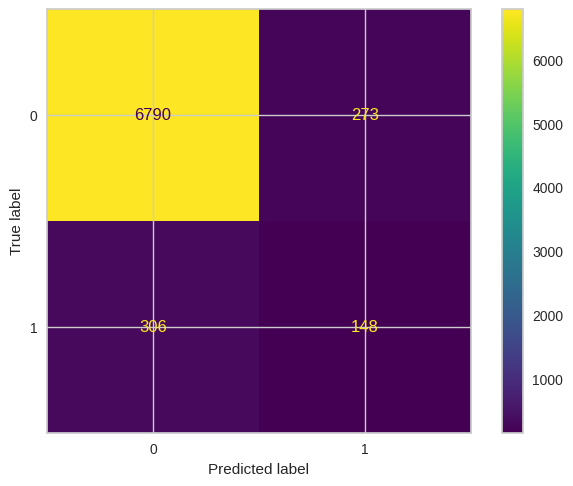

In [ ]:
predictions = stacking_model_dt.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=stacking_model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_model_dt.classes_)

disp.plot()
plt.show()


In [ ]:
#it's normal to get a low score for the precision or F1-score of the class 0, we can see that just 5% of test data that have the class 1;
print(train['target'].value_counts(normalize=True))
print(test['target'].value_counts(normalize=True))

target
0    0.5
1    0.5
Name: proportion, dtype: float64
target
0    0.939604
1    0.060396
Name: proportion, dtype: float64


##Feature Selection
Lets first use recursive feature selection. It removes 3 features.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE


# Initialize the estimator (e.g., ExtraTreesClassifier)
estimator = ExtraTreesClassifier(n_estimators=100, random_state=seed)

# Initialize RFE with the estimator and the number of features you want to select
# For example, if you want to select the top 10 features:
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE to your training data
rfe.fit(X_train, Y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print selected features
print("Selected Features:")
print(selected_features)

# Optionally, transform your data to keep only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train a final model using only the selected features
final_model = ExtraTreesClassifier(n_estimators=100, random_state=seed)
final_model.fit(X_train_rfe, Y_train)

# Evaluate the model on the test set
print("Model accuracy with selected features:", final_model.score(X_test_rfe, Y_test))


Selected Features:
Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign'],
      dtype='object')
Model accuracy with selected features: 0.9192497006784621


Lets use permitation feature importants. It removes 3 features too.

In [ ]:

from sklearn.inspection import permutation_importance

# Initialize the estimator (e.g., ExtraTreesClassifier)
model = ExtraTreesClassifier(n_estimators=100, random_state=seed)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=seed)

# Get the importance scores
importance_scores = perm_importance.importances_mean

# Create an array of indices sorted by importance (descending order)
sorted_indices = np.argsort(importance_scores)[::-1]

# Select top N features (for example, top 10)
top_n = 10
selected_indices = sorted_indices[:top_n]
selected_features = X_train.columns[selected_indices]

# Print selected features
print("Selected Features based on Permutation Importance:")
print(selected_features)

# Optionally, transform your data to keep only the selected features
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

# Train a final model using only the selected features
final_model = ExtraTreesClassifier(n_estimators=100, random_state=seed)
final_model.fit(X_train_selected, Y_train)

# Evaluate the model on the test set
print("Model accuracy with selected features:", final_model.score(X_test_selected, Y_test))


Selected Features based on Permutation Importance:
Index(['duration', 'month', 'contact', 'day', 'housing', 'marital', 'age',
       'loan', 'campaign', 'education'],
      dtype='object')
Model accuracy with selected features: 0.9451884700665188


##3- Clustering the customers using K_means and plotly
It will be a good thing to find customers who are more likely to buy the investment product. Let's determine the segment of customers the client should prioritize.

In [ ]:
#copy the dataset after applying smote
data=df_pycaret.copy()

In [ ]:
#choose positive labels
pos_customers=data[data['target']==1]

In [ ]:
#Determine X and Y
X=pos_customers.drop('target',axis=1)
Y=pos_customers['target']

Now, to use K-means model, it would be better if we use fist the Elbow method, to find the optimized value of clusters k.

In [ ]:
#Calculate inertia for each value of k
inertia=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)

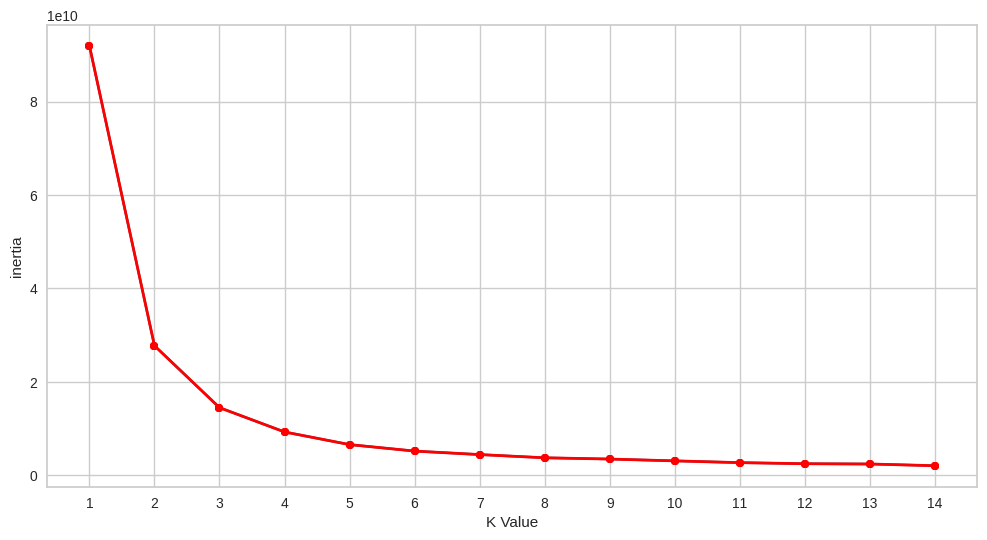

In [ ]:
#plot he elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,15),inertia)
plt.plot(range(1,15),inertia, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("inertia")
plt.show()

From the plot above, we can choose the optimized k value which is k=4. SO, let's apply k-means with k=4.

In [ ]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
pos_customers["label"] = y
#The new dataframe with the clustering done
pos_customers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,target,label
6,43,1,1,1,0,184,0,1,0,16,5,1019,11,1,2
7,32,4,2,2,0,311,0,0,2,12,8,757,2,1,2
12,27,9,2,2,0,4661,0,0,0,8,0,114,1,1,1
30,49,4,1,1,0,99,1,0,0,6,8,687,2,1,2
58,33,0,2,1,0,315,1,1,0,14,8,888,3,1,2


Now, let's plot the distribution of the clusters over the dataset using 3d plot with the plotly library. The choice of the features is based on their importance seen previously. So let's choose the duration, balance, and day features.


In [ ]:
PLOT = go.Figure()
for C in list(pos_customers.label.unique()):

    PLOT.add_trace(go.Scatter3d(x = pos_customers[pos_customers.label == C]['duration'],
                                y = pos_customers[pos_customers.label == C]['balance'],
                                z = pos_customers[pos_customers.label == C]['day'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))

PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'duration', titlefont_color = 'black'),
                                yaxis=dict(title = 'balance', titlefont_color = 'black'),
                                zaxis=dict(title = 'day', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

From the plot above, we can see clearly the four clusters created, regarding the 3 chosen features.
We can infer that the customers are clustered based on their balance

#Conclusion
In this project, I started by exploring and visualizing the dataset using different techniques. After assuring that the data is pretty cleaned, I was able to analyze the relationship between most of the features of our dataset and especially with the target variable. I used different graphs and plots to analyze and understand well the dataset and also I used the pretty reporting library sweetviz which summarizes most of the statistical analysis. After that, I removed most of the existing outliers in the data, and then I handled the imbalanced issue using the upsampling SMOTE method.
After completing the EDA step, I passed to the next step which is the Modeling phase.
For this purpose, I used first the Pycaret library which trains several important machine learning models to our dataset. The pycaret library helps to explore different essential plots and conclusions about the model selected like the confusion matrix, the Precision recall curve, the feature selection, and so on.
After that, I chose some of the best models detected to test separately each one and then apply Ensemble Learning models such as Voting and stacking.
The best model selected was the StackingClassifier with an accuracy of 93%.
To finalize the work, I used the unsupervised K-means model to cluster the customers in a 3D plot using the plotly library. I was able to see the clustering based on the most important 3 features of our dataset.
** An important thing to say is that the duration feature affects a lot the subscription of clients to a term deposit. And it's normal, as a customer who wants to subscribe will take more time to understand when buying a term deposit.